In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pandas as pd
from workflow.marker.get_markers_on_contigs_by_map_pct import GetMarkersOnContigsByMapPct
from workflow.plots.get_gc_content_and_contam import GetGcContentAndContam

In [2]:
DF_CONTIG = GetGcContentAndContam().output().read_cached()
DF_CONTIG.head()

,gid,contig,map_pct,length,gc
0,GCA_000196215.1,CP000013.1,0.000000,904246,28.304798
1,GCA_000196215.1,CP000014.1,96.000000,27108,25.601299
2,GCA_000196215.1,CP000015.1,97.560976,55560,26.465083
3,GCA_000143435.1,CP002034.1,95.134228,1828169,32.897724
4,GCA_000143435.1,CP002037.1,89.430894,242962,31.996773


In [3]:
DF_MARKER = GetMarkersOnContigsByMapPct().output().read_cached()
DF_MARKER.head()

,gid,marker,n,marker_type,contig
0,GCA_000371865.1,PF00380.20,0,unq,AQUG01000007.1
1,GCA_000371865.1,PF01025.20,0,unq,AQUG01000003.1
2,GCA_000371865.1,PF03726.15,0,unq,AQUG01000004.1
3,GCA_000371865.1,TIGR00020,0,unq,AQUG01000002.1
4,GCA_000371865.1,TIGR00059,0,unq,AQUG01000026.1


In [4]:
MARKER_FAIL_GIDS = {'GCA_002170165.1', 'GCA_002401495.1', 'GCA_014385135.2', 'GCA_017515185.1', 'GCA_900765805.1', 'GCA_905214645.1'}

In [5]:
def get_gid_contig_to_data():
    out = dict()
    for row in tqdm(DF_CONTIG.itertuples(), total=len(DF_CONTIG)):
        out[(row.gid, row.contig)] = row
    return out


D_GID_CONTIG_TO_DATA = get_gid_contig_to_data()

100%|██████████| 6927263/6927263 [00:16<00:00, 412807.42it/s]


In [6]:
from collections import defaultdict


def get_gid_marker_to_data():
    out = defaultdict(list)
    for row in tqdm(DF_MARKER.itertuples(), total=len(DF_MARKER)):
        out[(row.gid, row.contig)].append(row)
    return out
D_GID_CONTIG_TO_MARKER = get_gid_marker_to_data()

100%|██████████| 4100845/4100845 [00:09<00:00, 446938.67it/s]


In [7]:


def get_data():
    data = list()


    for gid_contig, contig_info in tqdm(D_GID_CONTIG_TO_DATA.items()):
        if gid_contig[0] not in MARKER_FAIL_GIDS:
            continue

        marker_rows = D_GID_CONTIG_TO_MARKER.get(gid_contig)
        if marker_rows is None:
            data.append({
                'gid': gid_contig[0],
                'contig': gid_contig[1],
                'n_markers': 0,
                'pct': contig_info.map_pct
            })
        else:
             data.append({
                 'gid': gid_contig[0],
                'contig': gid_contig[1],
                'n_markers': len(marker_rows),
                'pct': contig_info.map_pct
            })

    df = pd.DataFrame(data)
    return df


PLOT_DATA = get_data()
PLOT_DATA.head()


100%|██████████| 6927263/6927263 [00:01<00:00, 4193875.97it/s]


,gid,contig,n_markers,pct
0,GCA_002170165.1,NHFY01000082.1,0,20.000000
1,GCA_002170165.1,NHFY01000021.1,0,60.000000
2,GCA_002170165.1,NHFY01000083.1,0,60.000000
3,GCA_002170165.1,NHFY01000025.1,0,90.476190
4,GCA_002170165.1,NHFY01000055.1,0,85.714286


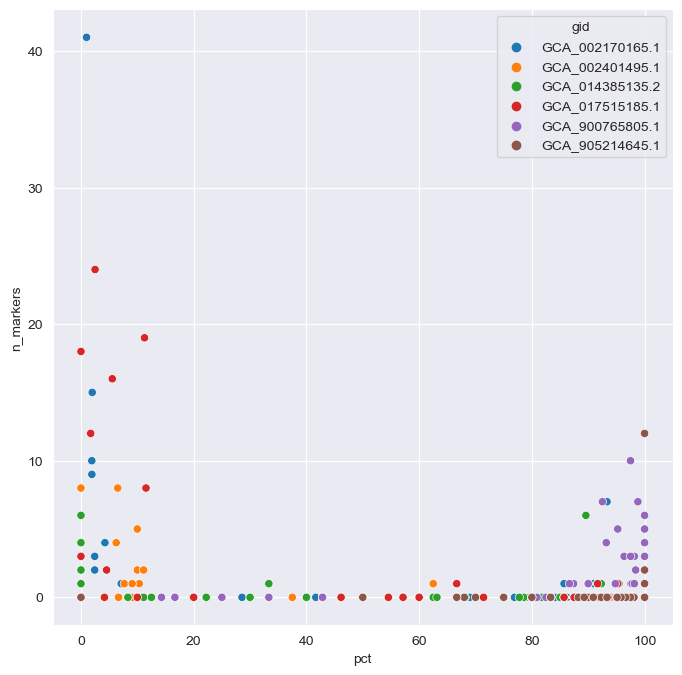

In [8]:

def make_plot():
    f, ax = plt.subplots(1, 1, figsize=(8,8))
    sns.scatterplot(data=PLOT_DATA, x='pct', y='n_markers', hue='gid')
    # sns.histplot(data=PLOT_DATA, x='pct', hue='gid')

    plt.show()

    # f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8), sharey=True)
    # ax1.set(yscale="log")
    # ax2.set(yscale="log")
    # ax3.set(yscale="log")
    # sns.histplot(PLOT_DATA, ax=ax1, bins=25)
    # sns.histplot(PLOT_DATA[PLOT_DATA['marker'] == 'present'], ax=ax2, bins=25)
    # sns.histplot(PLOT_DATA[PLOT_DATA['marker'] == 'none'], ax=ax3, bins=25)
    #
    # plt.show()

    return

make_plot()